In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [56]:
#importing dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)

In [57]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [5]:
df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [8]:
df.duplicated().sum()

0

We see our data is clean, so let;s make some visualization

In [10]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


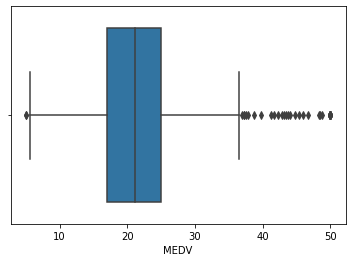

In [12]:
#as our MEDV columns consist of median values, boxplot will be a good choice 
sns.boxplot(df["MEDV"])

We see that while data is well distributed between 5 and 35 , there is quite lots of outlier, whihc are far from median 

(array([471.,   0.,  35.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

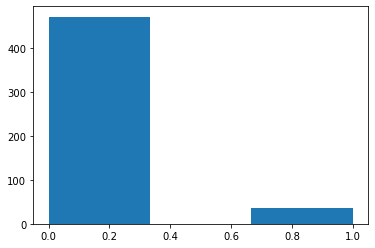

In [18]:
plt.hist(df["CHAS"],bins=3)

Most of tracts are do not bounds river, there are just a few tracts that bounds river

Let's is there any relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

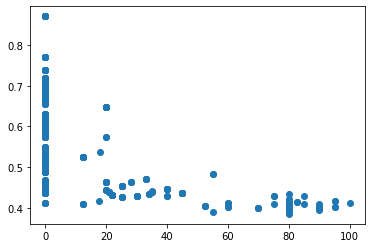

In [50]:
plt.scatter(df["ZN"],df["NOX"])


It seems there is a weak relatioship between these two variables

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <a list of 10 Patch objects>)

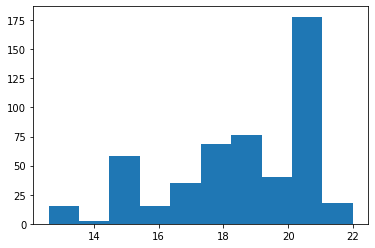

In [51]:
plt.hist(df["PTRATIO"])

## HYPOTHESIS TESTING

### Is there a significant difference in median value of houses bounded by the Charles river or not?

###### T test

In [64]:
scipy.stats.ttest_ind(df[df["CHAS"]==1]["MEDV"],df[df["CHAS"]==0]["MEDV"])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

As p-value is less than 0.05 , we reject null hypothesis as there is a difference between these two variables

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

###### ANOVA

In [71]:
#Proportion of AGE by MEDV
l=df.loc[(df["AGE"]<=35)]["MEDV"]
m=df.loc[(df["AGE"]>35)&(df["AGE"]<70)]["MEDV"]
h=df.loc[(df["AGE"]>70)]["MEDV"]

In [73]:
#ANOVA
f_statistic, p_value = scipy.stats.f_oneway(l,m,h)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


As p-value is less than 0.05 , we reject null hypothesis and we know that at least one of our var is different

### Is there any relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

###### Pearson correlation

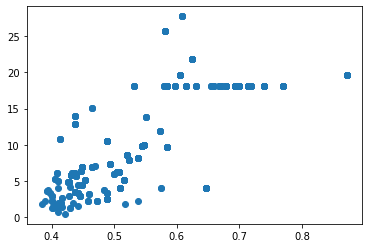

In [74]:
plt.scatter(df["NOX"],df["INDUS"])

In [75]:
scipy.stats.pearsonr(df["NOX"],df["INDUS"])

(0.763651446920915, 7.913361061239593e-98)

As the p-values is less than 0.05 , we reject the null hypothesis, and can see from result that there is positive cor of 76%

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

###### Regression analysis

In [77]:
from statsmodels.formula.api import ols
import statsmodels.api as sm


## X is the input variables (or independent variables)
X = df['DIS']
## y is the target/dependent variable
y = df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           1.21e-08
Time:                        17:35:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between DIS and MEDV